In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List the contents of your Google Drive root directory
print(os.listdir('/content/drive/MyDrive'))

['IMG_7278.jpeg', 'IMG_7279.jpeg', 'IMG_7280.jpeg', 'IMG_7281.jpeg', '3eac8ea4-76c1-47ce-b37f-64de03860176 (1).jpeg', '3eac8ea4-76c1-47ce-b37f-64de03860176.jpeg', 'IMG_8902 2.jpg', 'Colab Notebooks', 'Materi Pemrograman Fungsional 2023 Ganjil', '05. Formulir Biodata Pengusul (Ketua dan Anggota).docx', 'Pemrograman Fungsional 2023-ganjil', 'ZebrafishMotion Dataset', 'PEKERTI', 'AIS Dataset', 'Dataset', 'Ktp_Andi.pdf', 'Alumni PPI', 'KONEKSI HEALTH.gdoc', 'Laporan Rapat', 'BKD 2023-2024 GANJIL', 'Referee_form.pdf', 'Referee_form.gdoc', 'Kuis Kosong.gform', 'INDODIFFUSION', 'ISPF UK 2024', 'Copy of FORMAT_PROPOSAL_PRPB_Fin_v2.docx', 'LPDPxDRTPM2024', 'AndiDemon Lab', 'air quality_v7(2).docx', 'NPWP_Andi 2.pdf', 'HSIPU', 'BKD', '20110005_Prediksi Harga Mobil dengan Pendekatan Multimodal - FIQKI HAIDAR AMRULLOH.pdf', 'IPSD_CASE-BASED1', '41027-126322-2-PB.pdf', 'LAYOUT INFOTEL 824.gsheet', 'DFAT Australia-Indonesia', 'Form Desk Evaluation_Laksmi.docx', 'Form Desk Evaluation_Virgie.docx', 'K

In [1]:

import numpy as np
import torch
import cv2 as cv
import matplotlib.pyplot as plt
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader

In [ ]:
folder = "/content/drive/MyDrive/DATASET/cell"

In [ ]:
image = cv.imread(folder + "/good/h01.jpg")

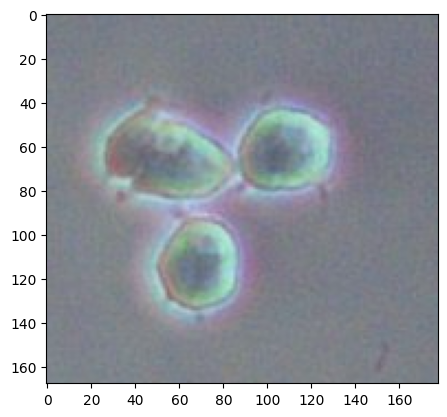

In [ ]:
plt.imshow(image)

In [ ]:
class CellDataset(Dataset):
  def __init__(self, folder):
    self.folder = folder
    self.dataset = []
    self.labels = []

    to_one_hot = np.eye(2)
    for e,i in enumerate(os.listdir(self.folder)):
      label = to_one_hot[e]
      for j in os.listdir(self.folder + "/" + i):
        self.dataset.append((cv.resize(cv.imread(self.folder + "/" + i + "/" + j), (200, 200)))/255)
        self.labels.append(label)

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    return torch.tensor(self.dataset[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)


In [ ]:
data_train = DataLoader(CellDataset(folder=folder), batch_size=4, shuffle=True)

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)
        self.relu = nn.ReLU() # Linear layer for weights and biases
        self.soft = nn.Softmax(dim=1)
    def forward(self, x):
        outputs = self.soft(self.relu(self.linear(x)))
        return outputs

class ConvTransformer(nn.Module):
    def __init__(self):
        super(ConvTransformer, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.lin = nn.Linear(35344, 512)
        self.mha = nn.MultiheadAttention(embed_dim=512, num_heads=8)
        self.norm = nn.LayerNorm(512)
        self.linear = nn.Linear(512, 512)

        self.fc1 = nn.Linear(512, 2)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # print(x.shape)
        x = self.pool(self.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(self.relu(self.conv2(x)))
        # print(x.shape)

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # print(x.shape)
        x = self.lin(x)
        # print(x.shape)
        for _ in range(1):
            x, _ = self.mha(x, x, x)
            x = self.norm(x)
            x = self.relu(self.linear(x))
        # print(x.shape)

        x = self.relu(self.fc1(x))

        return self.softmax(x)


In [ ]:
EPOCH = 100
LR = 0.001

model =  ConvTransformer() #LogisticRegression(200*200*3, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
loss_fn = nn.BCEWithLogitsLoss()

loss_all = []

for epoch in range(EPOCH):
  loss_epoch = 0
  for bacth, (data, label) in enumerate(data_train):
    # data = data.view(-1, 200*200*3)
    data = torch.permute(data, (0, 3, 1, 2))

    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, label)

    loss_epoch += loss.item()

    loss.backward()
    optimizer.step()
  print("EPOCH = ", epoch, ", loss = ", loss_epoch/len(data_train))
  loss_all.append(loss_epoch/len(data_train))


EPOCH =  0 , loss =  0.7262964820861817
EPOCH =  1 , loss =  0.7240769863128662
EPOCH =  2 , loss =  0.7240769863128662
EPOCH =  3 , loss =  0.7240769863128662
EPOCH =  4 , loss =  0.7240769863128662
EPOCH =  5 , loss =  0.7240769863128662
EPOCH =  6 , loss =  0.7240769863128662


KeyboardInterrupt: 

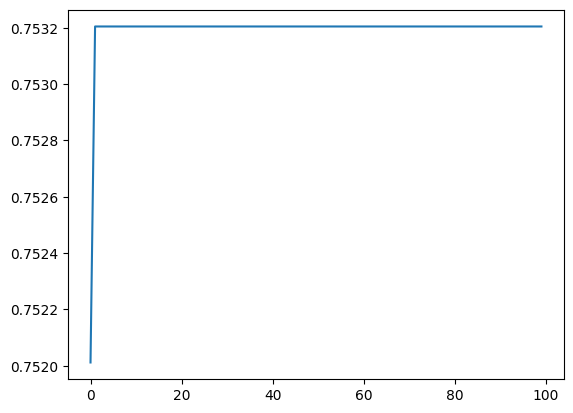

In [ ]:
# Create the plot
plt.plot(range(100), loss_all)